In [231]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

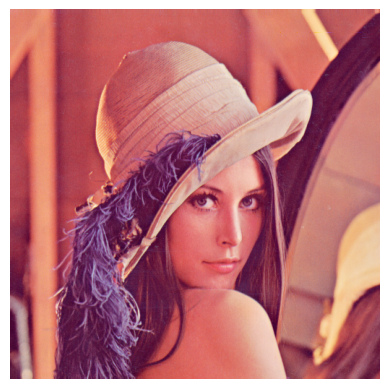

In [232]:
img = cv2.imread('lenna.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [233]:
from typing import Tuple


def flipRegion(img, regionBoundaries: Tuple[int, int, int, int]) -> np.ndarray:
    x,y,w,h =  regionBoundaries
    region = img[y:y+h, x:x+w]
    region = cv2.flip(region, 0)
    return region
    


In [234]:
def findEyesAndMouth(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eye_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_eye_tree_eyeglasses.xml')
    mouth_cascade = cv2.CascadeClassifier('haarcascade/haarcascade_mcs_mouth.xml')

    eyes = eye_cascade.detectMultiScale(gray)
    mouths = mouth_cascade.detectMultiScale(gray, 1.3, 4)
    
    return (eyes, mouths)

In [235]:
def flipImage(img) :
    img = cv2.flip(img, 0)
    return img

In [236]:
def rectangleGivenArea(img, parts):
    for (x, y, w, h) in parts:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return img

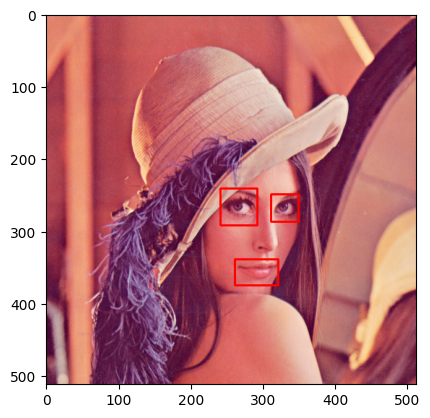

In [237]:
eyes, mouths = findEyesAndMouth(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

img = rectangleGivenArea(img_rgb.copy(), mouths)
img = rectangleGivenArea(img, eyes)

plt.imshow(img)
plt.show()

Flip the eyes and the mouth

In [238]:
imgToFlip = img_rgb.copy()

for eye in eyes:
    _x, _y, _w, _h = eye
    imgToFlip[_y:_y+_h, _x:_x+_w] = flipRegion(imgToFlip, eye)
    
for mouth in mouths:
    _x, _y, _w, _h = mouth
    imgToFlip[_y:_y+_h, _x:_x+_w] = flipRegion(imgToFlip, mouth)
    

Show fliped image and normal one

Text(0.5, 1.0, 'Flipped')

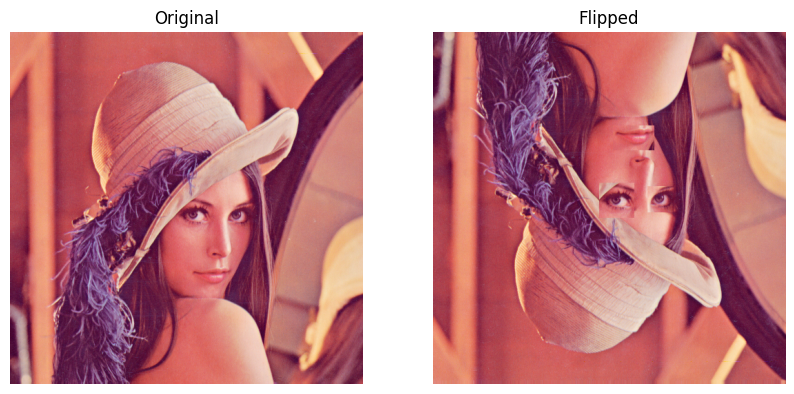

In [239]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_rgb)
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(flipImage(imgToFlip))
axs[1].axis('off')
axs[1].set_title('Flipped')